In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy

### Derivation

Starting with the Schrodinger Equation, 
$$i\partial_{t}\begin{pmatrix}\nu_{1} \\ \nu_{2} \end{pmatrix} = \hat{H_{m}} \begin{pmatrix}\nu_{1} \\ \nu_{2} \end{pmatrix}$$
where $\hat{H_{m}}$ is the Hamiltonian in the mass basis

$$i\partial_{t}\begin{pmatrix}\nu_{1} \\ \nu_{2} \end{pmatrix} = \begin{pmatrix}p + \frac{m_1^2}{2E} & 0\\ 0 & p + \frac{m_2^2}{2E} \end{pmatrix}\begin{pmatrix}\nu_{1} \\ \nu_{2} \end{pmatrix}$$

$$\partial_{t}\begin{pmatrix}\nu_{1} \\ \nu_{2} \end{pmatrix} = -i\begin{pmatrix}p + \frac{m_1^2}{2E} & 0\\ 0 & p + \frac{m_2^2}{2E} \end{pmatrix}\begin{pmatrix}\nu_{1} \\ \nu_{2} \end{pmatrix}$$

$$\partial_{t}U^\dagger\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix} = -i\begin{pmatrix}p + \frac{m_1^2}{2E} & 0\\ 0 & p + \frac{m_2^2}{2E} \end{pmatrix}U^\dagger\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix}$$

Doubt : Can we take U out of the derivative?

$$\partial_{t}\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix} = -iU\begin{pmatrix}p + \frac{m_1^2}{2E} & 0\\ 0 & p + \frac{m_2^2}{2E} \end{pmatrix}U^\dagger\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix}$$

$$\partial_{t}\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix} = -iU\begin{pmatrix}\frac{-\Delta m^2}{2E} & 0\\ 0 & \frac{\Delta m^2}{2E} \end{pmatrix}U^\dagger\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix}$$

Using $\omega = \frac{-\Delta m^2}{2E}$, 

$$\partial_{t}\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix} = -\frac{i\omega}{2}U\begin{pmatrix}1 & 0\\ 0 & -1 \end{pmatrix}U^\dagger\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix}$$

I can change the derivative with respect to time to one with respect to position because space and time are being treated similarly : on a similar footing like in relativity.

$$\partial_{x}\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix} = \frac{i\omega}{2}\begin{pmatrix}-\cos{2\theta} & \sin{2\theta}\\ \sin{2\theta} & \cos{2\theta} \end{pmatrix}\begin{pmatrix}\nu_{e} \\ \nu_{\mu} \end{pmatrix}$$

This gives us the differential equations for two-dimensional neutrino oscillation in the flavor eigenbasis - 

$$\boxed{\begin{aligned}
&\frac{d\nu_e}{dx} = \frac{i\omega}{2}(-\nu_e\cos{2\theta_{\nu}} + \nu_{\chi}\sin{2\theta_{\nu}}) \\
&\frac{d\nu_\chi}{dx} = \frac{i\omega}{2}(\nu_\chi\cos{2\theta_{\nu}} + \nu_{e}\sin{2\theta_{\nu}})
\end{aligned}
}$$

$\chi$ is used here because $\nu_{\chi}$ can represent both $\nu_\mu$ or $\nu_\tau$. We can also stop the derivation above right before I introduce the $U$ matrix to convert from the mass eigenbasis to the flavor eigenbasis, and that equation gives us the following differential equations for neutrino oscillations in the mass eigenbasis - 

$$\boxed{\begin{aligned}
&\frac{d\nu_1}{dx} = \frac{i\omega}{2}\nu_1 \\
&\frac{d\nu_2}{dx} = -\frac{i\omega}{2}\nu_2
\end{aligned}
}$$

Text(0, 0.5, '$P_{e}(x), P_{\\mu}(x)$')

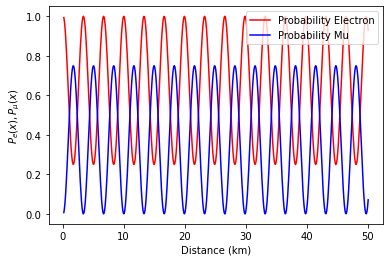

In [4]:
# First try : just solve flavor differential equations and plot probability vs. distance (fixed energy)
iota = 0 + 1j
energy = 10 * (10 ** 6) #MeV
omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
#omega = 1
theta = np.pi / 6
cos_two_theta = np.cos(2 * theta)
sin_two_theta = np.sin(2 * theta)
y_0 = [1 + 0j, 0 + 0j]

def f(t, y):
    return [((iota * omega) / 2) * ((-1 * y[0] * cos_two_theta) + (y[1] * sin_two_theta)), ((iota * omega) / 2) * ((y[0] * sin_two_theta) + (y[1] * cos_two_theta))]

r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf')
r.set_initial_value(y_0)

t1 = 50
dt = 0.1
amplitude = []
x = []
while r.successful() and r.t < t1:
    thing = r.integrate(r.t + dt)
#    print(r.t + dt, thing)
    amplitude.append(thing)
    x.append(r.t + dt)

amplitude = np.array(amplitude)
v_e = amplitude[:, 0]
v_mu = amplitude[:, 1]
p_e = v_e.conjugate() * v_e
p_mu = v_mu.conjugate() * v_mu

plt.plot(np.array(x), np.abs(p_e), color='red', label='Probability Electron')
plt.plot(np.array(x), np.abs(p_mu), color='blue', label='Probability Mu')
plt.xlabel('Distance (km)')
plt.legend(loc='upper right')
plt.ylabel(r'$P_{e}(x), P_{\mu}(x)$')
#plt.xlim(0, 100)

In [ ]:
# Changing value of omega and trying to match with analytical solution
omega = ((10 ** (-3)) / (2 * energy)) * 0.5 * (10 ** 10)
theta = (33 * np.pi) / 180

r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf')
r.set_initial_value(y_0)

t1 = 53
dt = 0.1
amplitude = []
x = []
while r.successful() and r.t < t1:
    thing = r.integrate(r.t + dt)
    #print(r.t + dt, thing)
    amplitude.append(thing)
    x.append(r.t + dt)

amplitude = np.array(amplitude)
v_e = amplitude[:, 0]
v_mu = amplitude[:, 1]
p_e = v_e.conjugate() * v_e
p_mu = v_mu.conjugate() * v_mu

plt.plot(np.array(x), np.abs(p_e), color='red', label='Probability Electron')
plt.plot(np.array(x), np.abs(p_mu), color='blue', label='Probability Mu')
plt.xlabel('Distance (km)')
plt.legend(loc='upper right')
plt.ylabel(r'$P_{e}(x), P_{\mu}(x)$')
#plt.xlim(0, 100)

In [ ]:
#Analytical solution
x = np.linspace(0, 53, 100000)
prob_amp = ((np.cos(theta) ** 2) * np.exp(-iota * omega * x)) + (np.sin(theta) ** 2)
prob = prob_amp.conjugate() * prob_amp
plt.plot(x, prob, color='blue', label='survival')
plt.plot(x, 1 - prob, color='orange', label='change')
plt.legend(loc='best')

In [ ]:
# Fixing distance = 50 km and plotting probability vs. energy

def solve_neutrino_oscillation(energy, theta):
    '''Solve the differential equation using the value of energy that is inputted;
    Enter energy in eV; returns an array containing the numpy arrays x, p_e, p_mu'''
    
    energy = energy
    omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
    #omega = 1
    theta = theta
    cos_two_theta = np.cos(2 * theta)
    sin_two_theta = np.sin(2 * theta)
    y_0 = [1 + 0j, 0 + 0j]

    def f(t, y):
        return [((iota * omega) / 2) * ((-1 * y[0] * cos_two_theta) + (y[1] * sin_two_theta)), ((iota * omega) / 2) * ((y[0] * sin_two_theta) + (y[1] * cos_two_theta))]

    r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf')
    r.set_initial_value(y_0)

    t1 = 50
    dt = 0.05
    amplitude = []
    x = []
    while r.successful() and r.t < t1:
        thing = r.integrate(r.t + dt)
        #print(r.t + dt, thing)
        amplitude.append(thing)
        x.append(r.t + dt)

    amplitude = np.array(amplitude)
    v_e = amplitude[:, 0]
    v_mu = amplitude[:, 1]
    p_e = v_e.conjugate() * v_e
    p_mu = v_mu.conjugate() * v_mu
    
    return np.array(x), p_e, p_mu

energies = np.linspace(0.1, 50, 100000) * (10 ** 6) #eV
prob_e = []
prob_mu = []

for energy_val in energies:
    distances, p_e, p_mu = solve_neutrino_oscillation(energy_val, np.pi / 6)
    prob_e.append(p_e[-2]) #Using the -2 index because I know that index has value of 50 km in distances array
    prob_mu.append(p_mu[-2])

x_array = energies * (10 ** (-6))
plt.plot(x_array, prob_e, label='Probability Electron')
plt.plot(x_array, prob_mu, label='Probability Muon')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.title('Neutrino Oscillation Probability vs. Energy')
plt.xlim(0, 4)

In [ ]:
plt.plot(x_array, prob_e, label='Probability Electron')
plt.plot(x_array, prob_mu, label='Probability Muon')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.title('Neutrino Oscillation Probability vs. Energy')

In [ ]:
#Analytical solution but for probability vs. energy plot, distance = 53 km

def solve_oscillation_analytical(energy, theta):
    omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
    x = np.linspace(0, 53, 100000)
    prob_amp = ((np.cos(theta) ** 2) * np.exp(-iota * omega * x)) + (np.sin(theta) ** 2)
    prob = prob_amp.conjugate() * prob_amp
    return np.array(x), np.array(prob), 1 - np.array(prob)
    
energies = np.linspace(1, 50, 10000) * (10 ** 6) #eV
prob_e = []
prob_mu = []

for energy_val in energies:
    distances, p_e, p_mu = solve_oscillation_analytical(energy_val, np.pi / 6)
#    print(distances[-2])
    prob_e.append(p_e[-2]) #Using the -2 index because I know that index has value of 50 km in distances array
    prob_mu.append(p_mu[-2])

plt.plot(energies * (10 ** (-6)), prob_e, label='Probability Electron')
plt.plot(energies * (10 ** (-6)), prob_mu, label='Probability Muon')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.title('Neutrino Oscillation Probability vs. Energy')
#plt.xlim(0, 4)

In [ ]:
#First plot but with mass eigenbasis
#omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
omega = 1

def g(t, y):
    return [((iota * omega) / 2) * y[0], ((-iota * omega) / 2) * y[1]]

r = scipy.integrate.ode(g).set_integrator('zvode',  method='bdf', nsteps=2000)
y_0 = [1 + 0j, 0 + 0j]
#t_0 = 100
#r.set_initial_value(y_0, t_0)
r.set_initial_value(y_0)

t1 = 5000
dt = 0.01
amplitude = []
x = []
while r.successful() and r.t < t1:
    thing = r.integrate(r.t + dt)
    amplitude.append(thing)
    x.append(r.t + dt)

amplitude = np.array(amplitude)
v_1 = amplitude[:, 0]
v_2 = amplitude[:, 1]
p_1 = v_1.conjugate() * v_1
p_2 = v_2.conjugate() * v_2

plt.plot(np.array(x), np.abs(p_1), color='red', label='Probability one')
plt.plot(np.array(x), np.abs(p_2), color='blue', label='Probability two')
plt.xlabel('Distance (km)')
#plt.legend(loc='upper right')
plt.ylabel(r'$P_{1}(x), P_{2}(x)$')
print(p_1[-1], p_2[-1])

In [ ]:
print(v_1.conjugate())
print('\n')
print(v_1)
print('\n')
print(v_1.conjugate() * v_1)


In [ ]:
# Clearly, that solution is wrong, so another approach is in order - we will once again solve the differential equations in the flavour basis, and then just use the change-of-basis matrix

iota = 0 + 1j
energy = 10 * (10 ** 6) #MeV
omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
#omega = 1
theta = np.pi / 6
cos_two_theta = np.cos(2 * theta)
sin_two_theta = np.sin(2 * theta)
y_0 = [1 + 0j, 0 + 0j]
t_0 = 100

def f(t, y):
    return [((iota * omega) / 2) * ((-1 * y[0] * cos_two_theta) + (y[1] * sin_two_theta)), ((iota * omega) / 2) * ((y[0] * sin_two_theta) + (y[1] * cos_two_theta))]

r = scipy.integrate.ode(f).set_integrator('zvode', method='bdf', nsteps=2000)
r.set_initial_value(y_0, t_0)

t1 = 5000
dt = 0.1
amplitude = []
x = []
while r.successful() and r.t < t1:
    thing = r.integrate(r.t + dt)
    #print(r.t + dt, thing)
    amplitude.append(thing)
    x.append(r.t + dt)

amplitude = np.array(amplitude)
v_e = amplitude[:, 0]
v_mu = amplitude[:, 1]
#Multiplying by COB matrix
v_1 = (v_e * np.cos(theta)) - (v_mu * np.sin(theta))
v_2 = (v_e * np.sin(theta)) + (v_mu * np.cos(theta))
p_1 = v_1.conjugate() * v_1
p_2 = v_2.conjugate() * v_2

plt.plot(np.array(x), np.abs(p_1), color='red', label='Probability 1')
plt.plot(np.array(x), np.abs(p_2), color='blue', label='Probability 2')
plt.xlabel('Distance (km)')
plt.legend(loc='upper right')
plt.ylabel(r'$P_{1}(x), P_{2}(x)$')
#plt.xlim(0, 100)

In [ ]:
print(v_1.conjugate())
print('\n')
print(v_1)
print('\n')
print(v_1.conjugate() * v_1)


What's going on? The above lines should be perfectly horizontal for all values of $x$. Below, we test a theory - the solver isn't able to handle the enormous problem of solving the differential equation for values of $x$ from 0 to 50000 with steps of only 0.01 (basically solving the differential equation at $\frac{50000}{0.01} = 5000000$ points). So, we are going to employ a smart mathematical trick - 

The differential equation is in the variable $x$. We are going to perform a change of variables. So defining the variable $x^{'}$ such that $Rx^{'}= x$, $R$ some constant will really help. Why? Well, if $x\in[0, 50000]$ and $R = 50000$, then $x^{'} \in [0, 1]$. This is going to be a much simpler problem (less computationally-expensive and error-prone) for our solver to complete.

Our equations will become
$$\boxed{\begin{aligned}
&\frac{d\nu_1}{dx^{'}} = R\frac{i\omega}{2}\nu_1 \\
&\frac{d\nu_2}{dx^{'}} = -R\frac{i\omega}{2}\nu_2
\end{aligned}
}$$

In [2]:
#First plot but with mass eigenbasis
#omega = ((7.59 * (10 ** (-3))) / (2 * energy)) * 0.5 * (10 ** 10)
omega = 1
R = 50000

def g(t, y):
    return [((iota * omega * R) / 2) * y[0], ((-iota * omega * R) / 2) * y[1]]

r = scipy.integrate.ode(g).set_integrator('zvode', method='bdf', nsteps=20000)
y_0 = [1 + 0j, 0 + 0j]
t_0 = 100
#r.set_initial_value(y_0, t_0)
r.set_initial_value(y_0)

t1 = 1
dt = 1.0 / (2 * R)
amplitude = []
x = []
counter = 0
while r.successful() and r.t < t1:
 #   print('counter', counter)
    thing = r.integrate(r.t + dt)
#    print(thing, 'thing')
    #print(r.t, 'r.t + dt')
    amplitude.append(thing)
    x.append(r.t + dt)
    counter += 1

amplitude = np.array(amplitude)
v_1 = amplitude[:, 0]
v_2 = amplitude[:, 1]
p_1 = v_1.conjugate() * v_1
p_2 = v_2.conjugate() * v_2

plt.plot(np.array(x), np.abs(p_1), color='red', label='Probability one')
plt.plot(np.array(x), np.abs(p_2), color='blue', label='Probability two')
plt.xlabel('Distance (km)')
plt.xlim(0, 1)
#plt.legend(loc='upper right')
plt.ylabel(r'$P_{1}(x), P_{2}(x)$')
print(p_1[-1], p_2[-1])

NameError: name 'scipy' is not defined

### Mikhail SW Resonance

Now, we want to add a matter term.

Text(0, 0.5, '$\\tan{(2\\theta_m)}$')

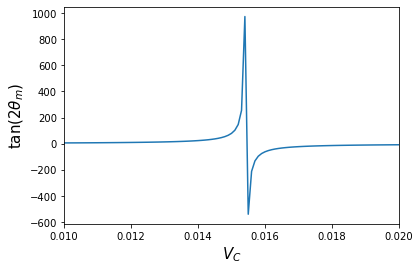

In [3]:
# Introducing the effect of the Matter potential
theta = 33 * (np.pi / 180)
energy = 10 * (10 ** 6) #MeV
omega = ((7.59 * (10 ** (-5))) / (2 * energy)) * 0.5 * (10 ** 10)

v_c = np.linspace(0, 100, 1000000) #units
tan_two_theta_m = (2 * omega * np.sin(2 * theta)) / (2 * omega * np.cos(2 * theta) - v_c)
plt.plot(v_c, tan_two_theta_m)
plt.xlim(0.01, .02)
plt.xlabel(r'$V_C$', fontsize=15)
plt.ylabel(r'$\tan{(2\theta_m)}$', fontsize=15)

Text(0, 0.5, '$\\tan{(2\\theta_m)}$')

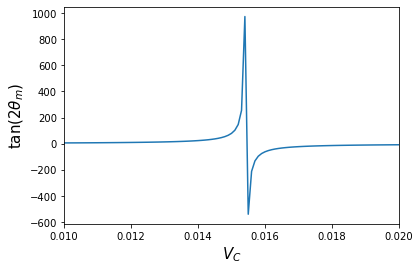

In [4]:
# Introducing the effect of the Matter potential
theta = 33 * (np.pi / 180)
energy = 10 * (10 ** 6) #eV
omega = ((7.59 * (10 ** (-5))) / (2 * energy)) * 0.5 * (10 ** 10)

v_c = np.linspace(0, 100, 1000000) #units
tan_two_theta_m = (2 * omega * np.sin(2 * theta)) / (2 * omega * np.cos(2 * theta) - v_c)
plt.plot(v_c, tan_two_theta_m)
plt.xlim(0.01, .02)
plt.xlabel(r'$V_C$', fontsize=15)
plt.ylabel(r'$\tan{(2\theta_m)}$', fontsize=15)

Text(0, 0.5, '$\\sin^2{(2\\theta_m)}$')

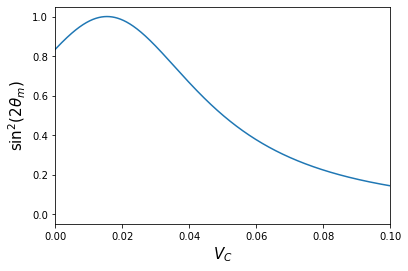

In [5]:
sin_squared_two_theta_m = np.sqrt(1 - (1 / (1 + (tan_two_theta_m ** 2)))) ** 2
plt.plot(v_c, sin_squared_two_theta_m)
plt.xlim(0, 0.1)
plt.xlabel(r'$V_C$', fontsize=15)
plt.ylabel(r'$\sin^2{(2\theta_m)}$', fontsize=15)

(-0.4, 0.4)

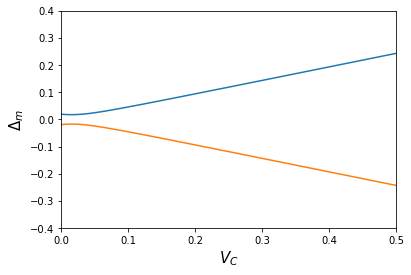

In [6]:
#Plotting two energy eigenvalues in matter basis
delta_m = np.sqrt(((omega * np.cos(2 * theta)) - (v_c / 2)) ** 2 + (omega * np.sin(2 * theta)) ** 2)
plt.plot(v_c, delta_m)
plt.plot(v_c, -delta_m)
plt.xlabel(r'$V_C$', fontsize=15)
plt.ylabel(r'$\Delta_m$', fontsize=15)
plt.xlim(0,0.5)
plt.ylim(-.4, 0.4)

44.02156442836028


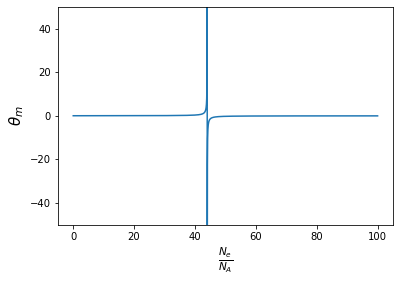

In [7]:
# Plotting mixing angle in matter vs. (electron density / avogadro's number)
#Trying to reproduce fig 9.2 in book

avogadro = 6.022 * (10 ** 23) # No. of units per mole
sin_squared_two_mixing_angle = 10 ** -3
delta_m_squared = 7 * (10 ** -6) #eV^2
fermi_coupling = (1.1663787 * (10 ** -5)) / (10 ** 18) #eV^-2
energy = 1 * (10 ** 6) #eV

x = np.linspace(0, 100, 10000) # per cm^-3
electron_density = x * avogadro # number of electrons per cm^-3
electron_density_at_resonance = ((delta_m_squared * np.sqrt(1 - sin_squared_two_mixing_angle)) / (2 * np.sqrt(2) * energy * fermi_coupling)) * ((0.5 * (10 ** 5)) ** 3)
tan_two_theta_m = (np.sqrt(sin_squared_two_mixing_angle) * delta_m_squared) / ((delta_m_squared *  np.sqrt(1 - sin_squared_two_mixing_angle)) - (np.sqrt(2) * fermi_coupling * (electron_density / ((0.5 * (10 ** 5)) ** 3)) * 2 * energy))

plt.plot(x, tan_two_theta_m)
#plt.xlim(0.00001, 5.0)
plt.xlabel(r'$\frac{N_e}{N_A}$', fontsize=15)
plt.ylabel(r'$\theta_m$', fontsize=15)
plt.ylim(-50, 50)
print(electron_density_at_resonance/avogadro) #

Text(0, 0.5, '$\\theta_m$')

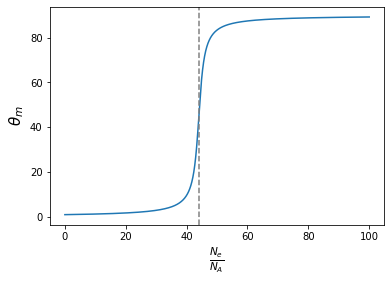

In [8]:
y = []
for i in range(len(electron_density)):
    if ((delta_m_squared *  np.sqrt(1 - sin_squared_two_mixing_angle)) - (np.sqrt(2) * fermi_coupling * (electron_density[i] / ((0.5 * (10 ** 5)) ** 3)) * 2 * energy)) < 0:
        y.append(((np.arctan(tan_two_theta_m[i]) / 2) + (np.pi / 2))* (180 / np.pi))
    else:
        y.append(((np.arctan(tan_two_theta_m[i]) / 2)* (180 / np.pi)))

plt.plot(x, y)
plt.axvline(x=electron_density_at_resonance/avogadro, color='gray',linestyle='--')
plt.xlabel(r'$\frac{N_e}{N_A}$', fontsize=15)
plt.ylabel(r'$\theta_m$', fontsize=15)

[7.00000000e-06 6.99841130e-06 6.99682260e-06 ... 8.89642127e-06
 8.89801027e-06 8.89959927e-06]
Hello
[0.00000000e+00 1.58949345e-09 3.17898691e-09 ... 1.58901660e-05
 1.58917555e-05 1.58933450e-05]


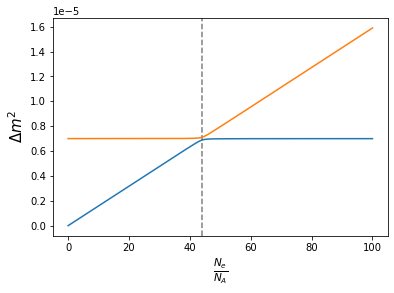

In [19]:
a = ((delta_m_squared * np.sqrt(1 - sin_squared_two_mixing_angle)) - (np.sqrt(2) * fermi_coupling * (electron_density / ((0.5 * (10 ** 5)) ** 3)) * 2 * energy))  ** 2
b = (delta_m_squared * np.sqrt(sin_squared_two_mixing_angle)) ** 2
cm_to_eV = (0.5 * (10 ** 5))
a_cc = (np.sqrt(2) * fermi_coupling * (electron_density / (cm_to_eV ** 3)) * 2 * energy)
delta_m_matter = np.sqrt(a + b)
delta_m_one = 0.5 * ((0 + 7 * (10 ** -6) + a_cc - delta_m_matter))
delta_m_two = 0.5 * ((0 + 7 * (10 ** -6) + a_cc + delta_m_matter))

plt.axvline(x=electron_density_at_resonance/avogadro, color='gray',linestyle='--')
plt.plot(x, delta_m_one)
plt.plot(x, delta_m_two)
plt.xlabel(r'$\frac{N_e}{N_A}$', fontsize=15)
plt.ylabel(r'$\Delta m^2$', fontsize=15)